# Importamos librerías

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

X_level = pd.Series([1,2,3,4,5,6,7,8,9,10])
y_salary = pd.Series([45,50,60,80,111,150,200,300,500,1000])

En https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html se puede encontrar toda la documentación para árboles de regresión.



Creamos nuestro modelo

In [4]:
X_level = X_level.values.reshape(-1,1)
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_level, y_salary)

DecisionTreeRegressor(random_state=0)

Realizamos el gráfico de nuestros datos y su predicción

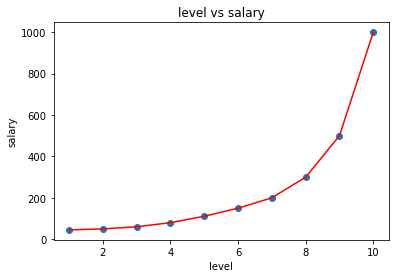

In [6]:
y_predict_salary = dtr.predict(X_level)

plt.plot(X_level, y_predict_salary, color = 'red')
plt.title('level vs salary')
plt.xlabel('level')
plt.ylabel('salary')
plt.scatter(X_level, y_salary)
plt.show()

Vemos que al tener pocos datos, nuestro modelo de predicción se ajusta totalmente a los datos ingresados, lo cual no es bueno para predecir nuevos datos.

In [8]:
export_graphviz(dtr, out_file = 'tree.dot', feature_names = ['Level'])

El archivo generado 'tree.dot' puede copiarse y pegarse en http://webgraphviz.com/ para ver el árbol generado.

Vamos a hacer un árbol de regresión pero con una base de datos más amplia (datos de alquileres de Boston que importaremos de sklearn.datasets

In [9]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [10]:
X_features = dsBoston.data
y_price = dsBoston.target

Dividimos los datos de entrenamiento y testeo del modelo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_price, test_size = 0.2, random_state = 42)

Creamos nuestro modelo de regresión

In [13]:
dtrBoston = DecisionTreeRegressor()
dtrBoston.fit(X_train, y_train)

DecisionTreeRegressor()

Evaluamos R^2.

In [ ]:
y_expected = y_test
y_predicted = dtrBoston.predict(X_test)
print('R^2 es {}'.format(metrics.r2_score(y_expected, y_predicted)))

Obtenemos el árbol de regresión

In [14]:
export_graphviz(dtrBoston, out_file = 'treeBoston.dot',feature_names=dsBoston.feature_names)

El gráfico generado es mucho más grande porque incluye más datos y más variables

In [16]:
y_predict = dtrBoston.predict(X_features)
#datos actuales vs los que predice el modelo en una tabla
dfAP= pd.DataFrame({'Actual':y_price, 'Predicción': y_predict})
#mostramos los primeros 10 elementos de la tabla
dfAP.head(10)

,Actual,Predicción
0,24.0,35.1
1,21.6,21.6
2,34.7,33.4
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,19.5
